In [1]:
!git clone https://github.com/docty/vision_enhancer.git

Cloning into 'vision_enhancer'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 89 (delta 22), reused 82 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 1.35 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [29]:
from vision_enhancer.lib import clahe

In [30]:
clahe = clahe.Clahe(
    image_path='/kaggle/working/vision_enhancer/gallery/image_3.jpg', 
    clipLimit=2.0,
    tileGridSize=(8, 8)
)

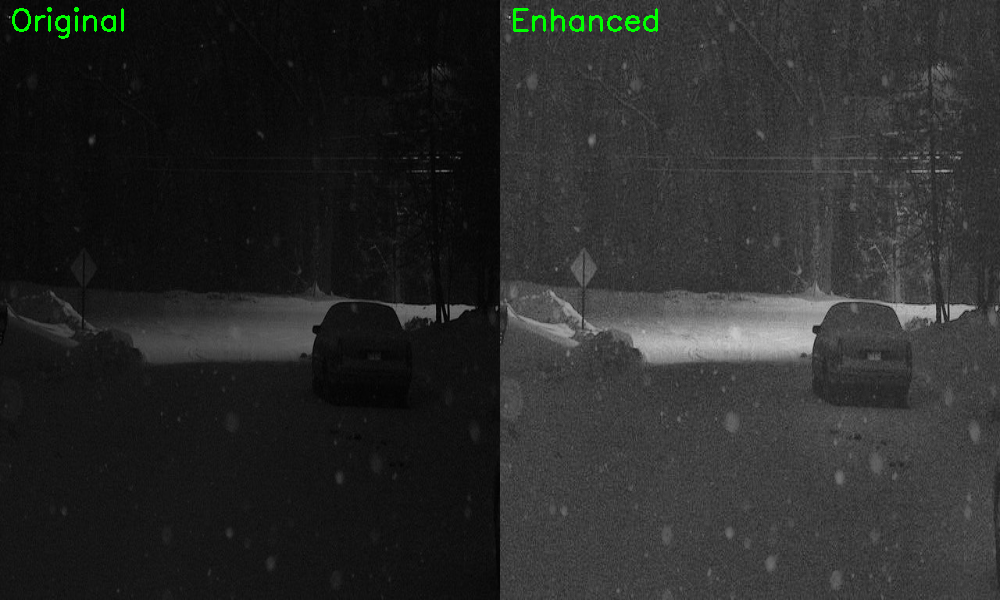

In [33]:
clahe.index_1()

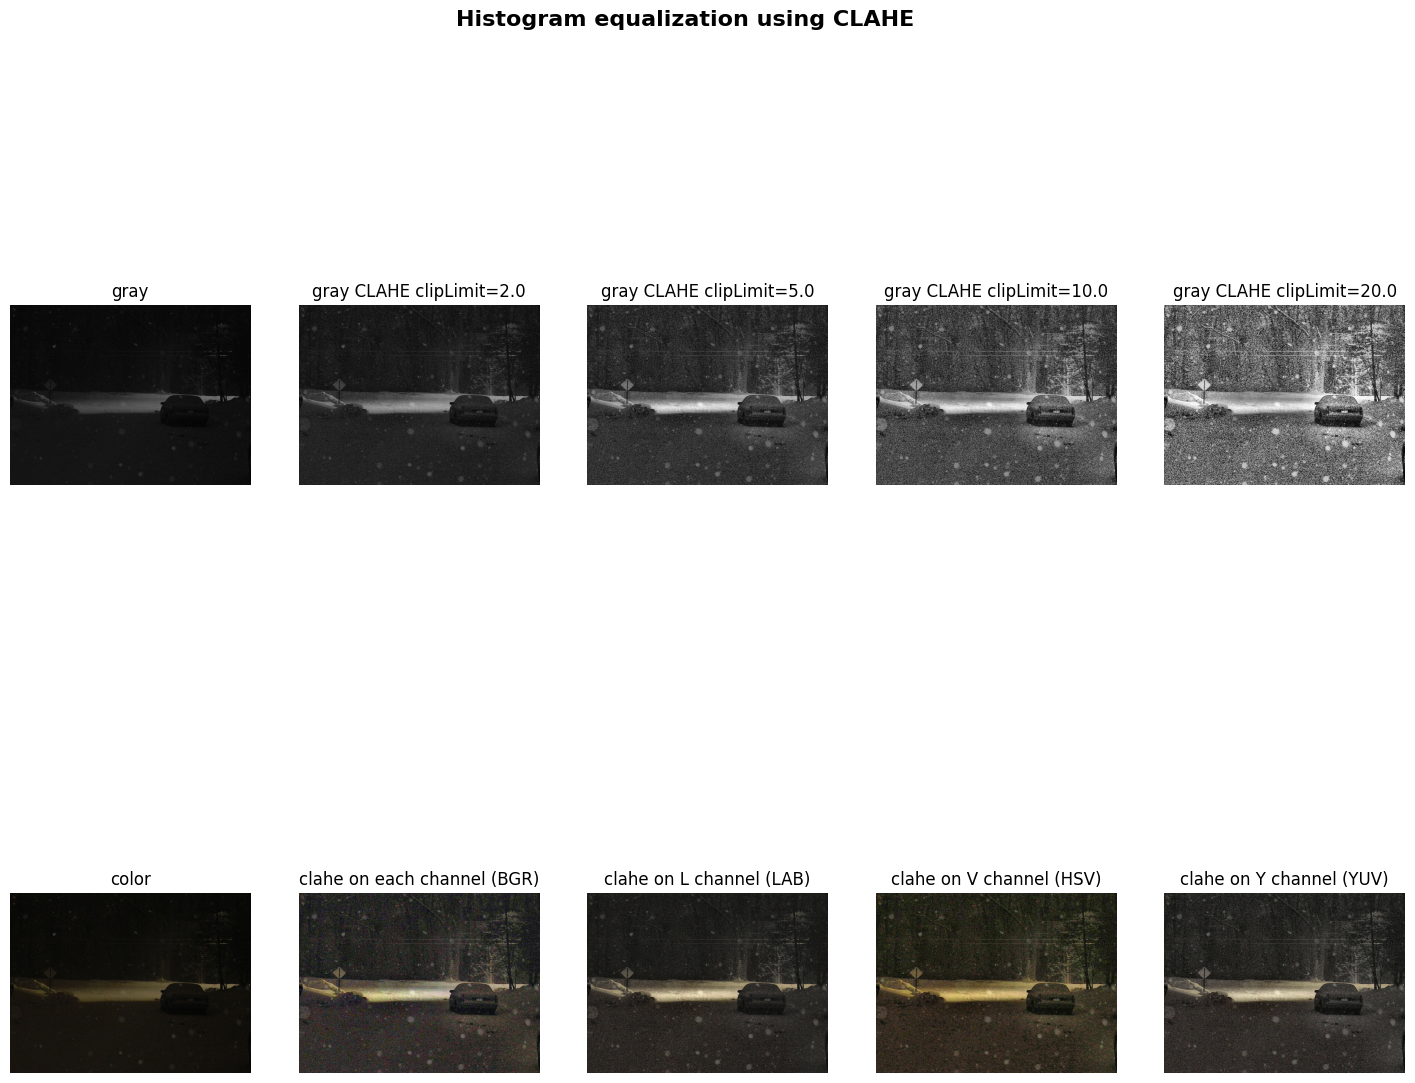

In [36]:
"""
Histogram equalization using CLAHE
"""

# Import required packages:
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def equalize_clahe_color_hsv(img):
    """Equalize the image splitting it after conversion to HSV and applying CLAHE
    to the V channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cla.apply(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image


def equalize_clahe_color_lab(img):
    """Equalize the image splitting it after conversion to LAB and applying CLAHE
    to the L channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    L, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
    eq_L = cla.apply(L)
    eq_image = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_Lab2BGR)
    return eq_image


def equalize_clahe_color_yuv(img):
    """Equalize the image splitting it after conversion to YUV and applying CLAHE
    to the Y channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    Y, U, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    eq_Y = cla.apply(Y)
    eq_image = cv2.cvtColor(cv2.merge([eq_Y, U, V]), cv2.COLOR_YUV2BGR)
    return eq_image


def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image


# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 14))
plt.suptitle("Histogram equalization using CLAHE", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('/kaggle/working/vision_enhancer/gallery/image_3.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create clahe:
clahe = cv2.createCLAHE(clipLimit=2.0)
# Apply CLAHE to the grayscale image varying clipLimit parameter:
gray_image_clahe = clahe.apply(gray_image)
clahe.setClipLimit(5.0)
gray_image_clahe_2 = clahe.apply(gray_image)
clahe.setClipLimit(10.0)
gray_image_clahe_3 = clahe.apply(gray_image)
clahe.setClipLimit(20.0)
gray_image_clahe_4 = clahe.apply(gray_image)

# Now, try the four created functions for equalize color images using CLAHE:
image_clahe_color = equalize_clahe_color(image)
image_clahe_color_lab = equalize_clahe_color_lab(image)
image_clahe_color_hsv = equalize_clahe_color_hsv(image)
image_clahe_color_yuv = equalize_clahe_color_yuv(image)

# Plot all the images
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=2.0", 2)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_2, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=5.0", 3)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_3, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=10.0", 4)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_4, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=20.0", 5)
show_img_with_matplotlib(image, "color", 6)
show_img_with_matplotlib(image_clahe_color, "clahe on each channel (BGR)", 7)
show_img_with_matplotlib(image_clahe_color_lab, "clahe on L channel (LAB)", 8)
show_img_with_matplotlib(image_clahe_color_hsv, "clahe on V channel (HSV)", 9)
show_img_with_matplotlib(image_clahe_color_yuv, "clahe on Y channel (YUV)", 10)

# Show the Figure:
plt.show()